In [46]:
from nltk.twitter import Twitter
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from sklearn.model_selection import train_test_split
import re
score = 0
import re
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
from nltk.metrics import ConfusionMatrix
from nltk.metrics import scores

In [2]:
dfn =  pd.read_csv('/Users/garlarohit/Desktop/neg.csv')
dfp = pd.read_csv('/Users/garlarohit/Desktop/pos.csv')

In [3]:
#len(dfn)
dfp.head()

,positive
0,a+
1,abound
2,abounds
3,abundance
4,abundant


In [4]:
tw = Twitter()
tw.tweets(keywords='avengers infinity war',stream=False,to_screen = False,limit=1000)

Writing to /Users/garlarohit/twitter-files/tweets.20180513-105635.json
Written 1000 Tweets


In [5]:
from nltk.corpus import twitter_samples
input_file = twitter_samples.abspath("/Users/garlarohit/twitter-files/tweets.20180511-191450.json")

In [6]:
from nltk.twitter.common import json2csv
with open(input_file) as fp:
    json2csv(fp, 'tweets_text.csv', ['text'])

In [7]:
for line in open('tweets_text.csv').readlines()[:100]:
    print(line)

text

"RT @SavinTheBees: Thanos vs Captain America



Avengers Infinity War (2018) https://t.co/FbkR8icLAX"

"RT @SavinTheBees: Thanos vs Captain America



Avengers Infinity War (2018) https://t.co/FbkR8icLAX"

RT @MarvelChampions: How many times have you seen Marvel Studios' @Avengers: Infinity War? You can now add Captain America (Infinity War) t…

"RT @schweinsister: “Avengers: Infinity War is the best movie of this year”



You sure 👀👀👀 https://t.co/KJ38ebWAcK"

#YIAYIW2 Avengers: Infinity War 2: Attack of the Clones

"RT @LAUKEYSON: So I see y’all needed Infinity War to realize that Thor was the strongest Avengers

But have you seen Thor Ragnarok already h…"

Avengers: Infinity War (2018) https://t.co/O5Ln85690u

"RT @SavinTheBees: Thanos vs Captain America



Avengers Infinity War (2018) https://t.co/FbkR8icLAX"

"RT @SavinTheBees: Thanos vs Captain America



Avengers Infinity War (2018) https://t.co/FbkR8icLAX"

RT @braunermegda: Avengers: Infinity War (2018) https://t.co/RGc4

In [8]:
with open(input_file) as fp:
    json2csv(fp, 'tweets.20180511-191450.tweet.csv',
            ['created_at', 'favorite_count', 'id', 'in_reply_to_status_id', 
            'in_reply_to_user_id', 'retweet_count', 'retweeted', 
            'text', 'truncated', 'user.id'])

In [9]:

tweets = pd.read_csv('tweets.20180511-191450.tweet.csv', index_col=2, header=0, encoding="utf8")
tweets.head(5)

,created_at,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweet_count,retweeted,text,truncated,user.id
id,,,,,,,,,
995079740775116800,Fri May 11 23:14:32 +0000 2018,0,NaN,NaN,237,False,RT @SavinTheBees: Thanos vs Captain America\n\...,False,890705862746136576
995079693840740355,Fri May 11 23:14:21 +0000 2018,0,NaN,NaN,237,False,RT @SavinTheBees: Thanos vs Captain America\n\...,False,4809709812
995079682084106242,Fri May 11 23:14:18 +0000 2018,0,NaN,NaN,330,False,RT @MarvelChampions: How many times have you s...,False,4620777998
995079675637567488,Fri May 11 23:14:17 +0000 2018,0,NaN,NaN,20,False,RT @schweinsister: “Avengers: Infinity War is ...,False,838912246633857024
995079657962856448,Fri May 11 23:14:12 +0000 2018,0,NaN,NaN,0,False,#YIAYIW2 Avengers: Infinity War 2: Attack of t...,False,3002642204


In [10]:
tweets = tweets.reset_index()

In [11]:
pt=pd.DataFrame()
pt['tweets']=[]

In [12]:
tweets['score']=0

In [13]:
tweets.head()

,id,created_at,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweet_count,retweeted,text,truncated,user.id,score
0,995079740775116800,Fri May 11 23:14:32 +0000 2018,0,NaN,NaN,237,False,RT @SavinTheBees: Thanos vs Captain America\n\...,False,890705862746136576,0
1,995079693840740355,Fri May 11 23:14:21 +0000 2018,0,NaN,NaN,237,False,RT @SavinTheBees: Thanos vs Captain America\n\...,False,4809709812,0
2,995079682084106242,Fri May 11 23:14:18 +0000 2018,0,NaN,NaN,330,False,RT @MarvelChampions: How many times have you s...,False,4620777998,0
3,995079675637567488,Fri May 11 23:14:17 +0000 2018,0,NaN,NaN,20,False,RT @schweinsister: “Avengers: Infinity War is ...,False,838912246633857024,0
4,995079657962856448,Fri May 11 23:14:12 +0000 2018,0,NaN,NaN,0,False,#YIAYIW2 Avengers: Infinity War 2: Attack of t...,False,3002642204,0


In [14]:
for i in range(len(tweets)):
    print (tweets['text'][i])

RT @SavinTheBees: Thanos vs Captain America

Avengers Infinity War (2018) https://t.co/FbkR8icLAX
RT @SavinTheBees: Thanos vs Captain America

Avengers Infinity War (2018) https://t.co/FbkR8icLAX
RT @MarvelChampions: How many times have you seen Marvel Studios' @Avengers: Infinity War? You can now add Captain America (Infinity War) t…
RT @schweinsister: “Avengers: Infinity War is the best movie of this year”

You sure 👀👀👀 https://t.co/KJ38ebWAcK
#YIAYIW2 Avengers: Infinity War 2: Attack of the Clones
RT @LAUKEYSON: So I see y’all needed Infinity War to realize that Thor was the strongest Avengers
But have you seen Thor Ragnarok already h…
Avengers: Infinity War (2018) https://t.co/O5Ln85690u
RT @SavinTheBees: Thanos vs Captain America

Avengers Infinity War (2018) https://t.co/FbkR8icLAX
RT @SavinTheBees: Thanos vs Captain America

Avengers Infinity War (2018) https://t.co/FbkR8icLAX
RT @braunermegda: Avengers: Infinity War (2018) https://t.co/RGc4yF75TV
Listening to Avengers Infinity 

"All of those ready to take on the titan that is Thanos, please rise." Here's everything you need to know about pla… https://t.co/UofWmFZoYd
RT @MarvelStudios: .@Avengers: #InfinityWar is the #1 Movie in the World. Be a part of cinematic history and see it again. Get tickets now:…
How Avengers: Infinity War turned Josh Brolin into an eight-foot purple madman https://t.co/PEJzmR08Oi https://t.co/WhSAOU6i8O
RT @KTonarella: Marvel : "Avengers Infinity War is the biggest selling movie of all-time"
DC : "Well we're fucked then aren't we ?" https:/…
RT @heavenstiel: Avengers: Infinity War but in vines https://t.co/z2QCSh9MOU
I liked a @YouTube video https://t.co/ZIMeq7w92F Snitch Siblings (Part 4) Avengers Infinity War Edition
RT @SavinTheBees: Thanos vs Captain America

Avengers Infinity War (2018) https://t.co/FbkR8icLAX
RT @SavinTheBees: Thanos vs Captain America

Avengers Infinity War (2018) https://t.co/FbkR8icLAX
Avengers: Infinity "You remember that sad ending, well guess what it does

In [15]:
tweets['text'] = tweets['text'].map(lambda x: re.sub(r'\W'," ", x))
tweets['text'] = tweets['text'].map(lambda x: re.sub('[0-9]',"", x))
tweets['text'] = tweets['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [16]:
c=0
for i in range(len(tweets)):
    z = tweets.astype(str).get_value(i,'text').split()
    for j in range(len(z)):
        for k in range(len(dfp)):
            if z[j] ==dfp['positive'][k]:
                tweets['score'][i]=tweets['score'][i] + 1
        for k in range(len(dfn)):
            if z[j] == dfn['Negative'][k]:
                tweets['score'][i]=tweets['score'][i] - 1
    if tweets['score'][i]>0:
        tweets['score'][i]=1
    elif tweets['score'][i]<0:
        tweets['score'][i]=-1
    else:
        tweets["score"][i]=0
    
        #t=(d,"neg")
    #d={}
    #b.append(t)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value i

In [17]:
import numpy as np
np.mean(tweets['score']==0)

0.75700000000000001

In [18]:
for x in range(len(dfp)):
    if dfp['positive'][x]=='impressed':
        print (dfp['positive'][x])

impressed


In [19]:
train, test = train_test_split(tweets, test_size=0.3)

In [20]:
train.head()
train = train.reset_index(drop=True)
train.head()

,id,created_at,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweet_count,retweeted,text,truncated,user.id,score
0,995077394275823618,Fri May 11 23:05:13 +0000 2018,0,NaN,NaN,0,False,We live time buy tickets Avengers Infinity War...,False,2490854719,0
1,995068091812990977,Fri May 11 22:28:15 +0000 2018,0,NaN,NaN,237,False,RT SavinTheBees Thanos vs Captain America Aven...,False,457990447,0
2,995070561708470273,Fri May 11 22:38:04 +0000 2018,0,NaN,NaN,237,False,RT SavinTheBees Thanos vs Captain America Aven...,False,871248991408619520,0
3,995076328792756226,Fri May 11 23:00:59 +0000 2018,0,NaN,NaN,16,False,RT Variety Avengers InfinityWar headed fourth ...,False,74332792,0
4,995079593072541696,Fri May 11 23:13:57 +0000 2018,0,NaN,NaN,0,False,I liked YouTube video https co fSsmuqLibr Aven...,False,244661746,1


In [21]:
test.head()
test = test.reset_index(drop=True)
test.head()

,id,created_at,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweet_count,retweeted,text,truncated,user.id,score
0,995070398831235072,Fri May 11 22:37:25 +0000 2018,0,NaN,NaN,1,False,RT Toddler_Bradley Round Avengers Infinity War...,False,715486207,1
1,995072517550243840,Fri May 11 22:45:50 +0000 2018,0,NaN,NaN,836,False,RT MarvelStudios It leading Go journey years M...,False,829744503565205504,1
2,995076501786824710,Fri May 11 23:01:40 +0000 2018,0,NaN,NaN,237,False,RT SavinTheBees Thanos vs Captain America Aven...,False,3095179227,0
3,995072896782536708,Fri May 11 22:47:20 +0000 2018,0,NaN,NaN,37,False,RT Infinity_Stark Seen Infinity War Discriptiv...,False,994365908771655680,0
4,995070514241601537,Fri May 11 22:37:52 +0000 2018,0,NaN,NaN,38,False,RT woIvern avengers infinity war dir russo bro...,False,2823088281,0


In [22]:
b=[]
c=[]
d={}
e={}

In [23]:
for i in range(len(train)):
    z = train.astype(str).get_value(i,'text').split()
    for j in range(len(z)):
        d[p_stemmer.stem(z[j])]= True
        if train['score'][i]==0:
            t=(d,"Neutral")
        elif train['score'][i]==1:
            t=(d,"Positive")
        else:
            t=(d,"Negative")
    d={}
    b.append(t)

for i in range(len(test)):
    z = test.astype(str).get_value(i,'text').split()
    for j in range(len(z)):
        e[p_stemmer.stem(z[j])]= True
        if test['score'][i]==0:
            t=(e,"Neutral")
        elif test['score'][i]==1:
            t=(e,"Positive")
        else:
            t=(e,"Negative")
    e={}
    c.append(t)

In [24]:
import nltk
 
numIterations = 10
 
algorithm = nltk.classify.MaxentClassifier.ALGORITHMS[0]
classifier = nltk.MaxentClassifier.train(b, algorithm, max_iter=numIterations)
classifier.show_most_informative_features(10)

  ==> Training (10 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -1.09861        0.203
             2          -1.09050        0.861
             3          -1.08248        0.864
             4          -1.07454        0.864
             5          -1.06667        0.869
             6          -1.05889        0.873
             7          -1.05119        0.873
             8          -1.04357        0.873
             9          -1.03603        0.873
         Final          -1.02857        0.873
  -0.036 vs==True and label is 'Positive'
  -0.036 savinthebe==True and label is 'Negative'
  -0.032 infinitywar==True and label is 'Negative'
  -0.029 marvel==True and label is 'Negative'
  -0.024 get==True and label is 'Negative'
  -0.024 time==True and label is 'Negative'
  -0.023 movi==True and label is 'Negative'
  -0.022 RT==True and label is 'Negative'
  -0.021 thano==True and label is 'Negative'
  -0.020 

In [25]:
a1=[]
a2=[]
for review in c:
    label = review[1]
    a1.append(label)
    text = review[0]
    determined_label = classifier.classify(text)
    a2.append(determined_label)
    print (determined_label, label)

Neutral Positive
Positive Positive
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Positive
Neutral Negative
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Positive
Positive Positive
Neutral Negative
Neutral Neutral
Neutral Positive
Neutral Positive
Neutral Neutral
Positive Positive
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Positive Positive
Neutral Neutral
Positive Positive
Neutral Neutral
Neutral Neutral
Positive Positive
Neutral Neutral
Positive Positive
Neutral Neutral
Neutral Neutral
Positive Positive
Positive Positive
Neutral Neutral
Neutral Neutral
Neutral Positive
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Positive Positive
Neutral Neutral
Neutral Neutral
Neutral Neut

In [28]:
scores.accuracy(a1,a2)

0.8766666666666667

In [29]:
cloudofwords=[]
for i in range(len(b)):
    for j in range(len(list(b[i][0]))):
        for k in range(len(dfp)):
            if list(b[i][0])[j] == dfp['positive'][k]:
                cloudofwords.append(str(list(b[i][0])[j]))
            elif list(b[i][0])[j] == dfn['Negative'][k]:
                cloudofwords.append(str(list(b[i][0])[j]))
        for h in range(k,len(dfn)):
            if list(b[i][0])[j] == dfn['Negative'][h]:
                cloudofwords.append(str(list(b[i][0])[j]))
                

In [30]:
from wordcloud import WordCloud
cloudofwords[:] = [x for x in cloudofwords if x != 'marvel']
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(cloudofwords))

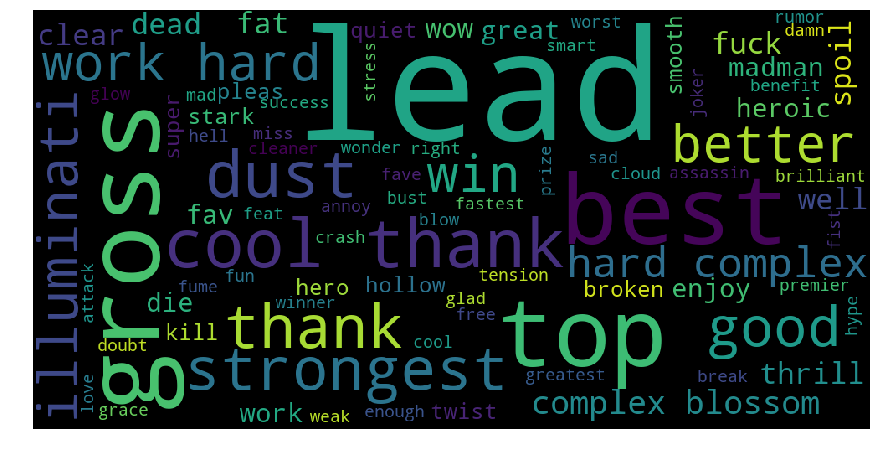

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [32]:
from nltk.metrics import ConfusionMatrix
from nltk.metrics import scores

In [33]:
cm= ConfusionMatrix(a1,a2)

In [34]:
print (cm)

         |   N       P |
         |   e   N   o |
         |   g   e   s |
         |   a   u   i |
         |   t   t   t |
         |   i   r   i |
         |   v   a   v |
         |   e   l   e |
---------+-------------+
Negative |  <.> 13   . |
 Neutral |   .<232>  . |
Positive |   .  24 <31>|
---------+-------------+
(row = reference; col = test)



In [35]:
scores.accuracy(a1,a2)
precision_p = cm['Positive','Positive']/(cm['Positive','Positive']+cm['Neutral','Positive']+cm['Negative','Positive'])
recall_p = cm['Positive','Positive']/(cm['Positive','Positive'] + cm['Positive','Neutral'] + cm['Positive','Negative'])
f_p = 2*precision_p *recall_p/(precision_p + recall_p)

if (cm['Negative','Negative']+cm['Neutral','Negative']+cm['Positive','Negative'])==0:
    precision_n = 1
else:
    precision_n = cm['Negative','Negative']/(cm['Negative','Negative']+cm['Neutral','Negative']+cm['Positive','Negative'])
recall_n = cm['Negative','Negative']/(cm['Negative','Negative'] + cm['Negative','Neutral'] + cm['Negative','Positive'])
f_n = 2*precision_n *recall_n/(precision_n + recall_n)

In [36]:
print(precision_p,recall_p,f_p,precision_n,recall_n,f_n)

1.0 0.5636363636363636 0.7209302325581396 1 0.0 0.0


In [37]:
from nltk.classify import NaiveBayesClassifier

In [38]:
numIterations = 10
 

classifierNB = nltk.NaiveBayesClassifier.train(b)
classifierNB.show_most_informative_features(10)

Most Informative Features
                     end = True           Negati : Neutra =     71.2 : 1.0
                      So = True           Positi : Neutra =     38.0 : 1.0
                    like = True           Positi : Neutra =     37.3 : 1.0
                      vs = True           Neutra : Positi =     27.6 : 1.0
                  realli = True           Negati : Neutra =     25.8 : 1.0
                    post = True           Negati : Neutra =     25.8 : 1.0
                    toni = True           Negati : Neutra =     25.8 : 1.0
                     die = True           Negati : Neutra =     25.8 : 1.0
                  thread = True           Negati : Neutra =     25.8 : 1.0
                    seem = True           Negati : Neutra =     25.8 : 1.0


In [39]:
a3=[]
a4=[]
for review in c:
    labelNB = review[1]
    a3.append(labelNB)
    text = review[0]
    determined_labelNB = classifierNB.classify(text)
    a4.append(determined_labelNB)
    print (determined_labelNB, labelNB)

Neutral Positive
Positive Positive
Neutral Neutral
Positive Neutral
Neutral Neutral
Negative Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Negative Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Positive Positive
Negative Negative
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Negative Neutral
Neutral Neutral
Positive Positive
Positive Positive
Negative Negative
Neutral Neutral
Positive Positive
Positive Positive
Neutral Neutral
Negative Positive
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Positive Positive
Neutral Neutral
Positive Positive
Neutral Neutral
Neutral Neutral
Positive Positive
Neutral Neutral
Positive Positive
Negative Neutral
Neutral Neutral
Positive Positive
Positive Positive
Neutral Neutral
Positive Neutral
Negative Positive
Neutral Neutral
Neutral Neutral
Neutral Neutral
Neutral Neutral
Negative Positive
Neutral Neutral
Neutral Neutral

In [40]:
scores.accuracy(a3,a4)

0.77

In [41]:
cm= ConfusionMatrix(a3,a4)

In [43]:
precision_p = cm['Positive','Positive']/(cm['Positive','Positive']+cm['Neutral','Positive']+cm['Negative','Positive'])
recall_p = cm['Positive','Positive']/(cm['Positive','Positive'] + cm['Positive','Neutral'] + cm['Positive','Negative'])
f_p = 2*precision_p *recall_p/(precision_p + recall_p)

if (cm['Negative','Negative']+cm['Neutral','Negative']+cm['Positive','Negative'])==0:
    precision_n = 1
else:
    precision_n = cm['Negative','Negative']/(cm['Negative','Negative']+cm['Neutral','Negative']+cm['Positive','Negative'])
recall_n = cm['Negative','Negative']/(cm['Negative','Negative'] + cm['Negative','Neutral'] + cm['Negative','Positive'])
f_n = 2*precision_n *recall_n/(precision_n + recall_n)

In [44]:
print(precision_p,recall_p,f_p,precision_n,recall_n,f_n)

0.75 0.7090909090909091 0.7289719626168225 0.1746031746031746 0.8461538461538461 0.2894736842105263


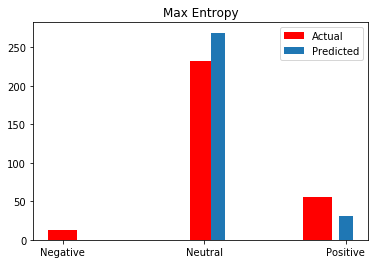

In [79]:
#Max Entropy Graph
plt.hist(a1,color='Red',label = "Actual",align = 'left')
plt.hist(a2,label = "Predicted",align ='right')
plt.title('Max Entropy')
plt.legend()
plt.show()

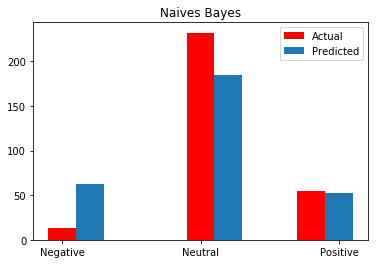

In [80]:
#Naives Bayes
plt.hist(a3,color='Red',align = 'left',label = "Actual")
plt.hist(a4,align = 'right', label = "Predicted")
plt.title('Naives Bayes')
plt.legend()
plt.show()